# City Council District 07 Contributions

## Ivana Moore

### Import Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.ticker as mtick


### Read in all the Data

In [3]:
candidates_2021 = pd.read_csv('candidates.csv')
contributions_2021 = pd.read_csv('2021_Contributions.csv')
candidate_contribution_2021 = pd.merge(contributions_2021,candidates_2021, how='left', left_on = 'RECIPNAME', right_on = 'didate')
cd7_2021 = candidate_contribution_2021[candidate_contribution_2021['Office Sought']=='City Council District 07']
cd7_2013 = pd.read_csv('2013_Contributions.csv')



/Users/ivanamoore/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# How much money is in CD7 race?

Text(0, 0.5, 'Total Amount in Dollars')

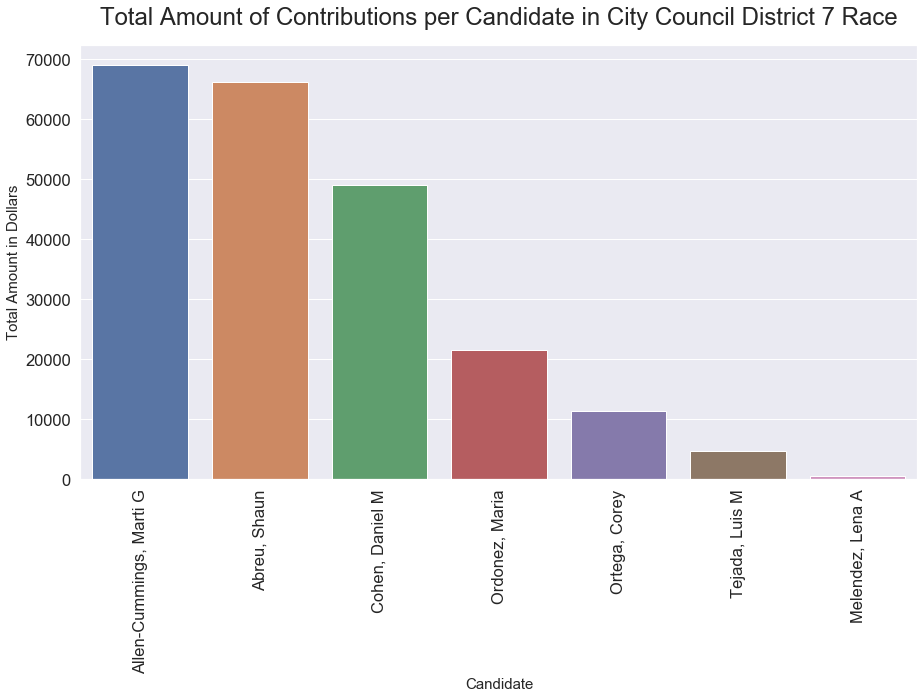

In [4]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = cd7_2021.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False))
plt.xticks(rotation = 90)

plt.title('Total Amount of Contributions per Candidate in City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Total Amount in Dollars', fontsize = 15)



# How does CD7 compare to other races (2021)?

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

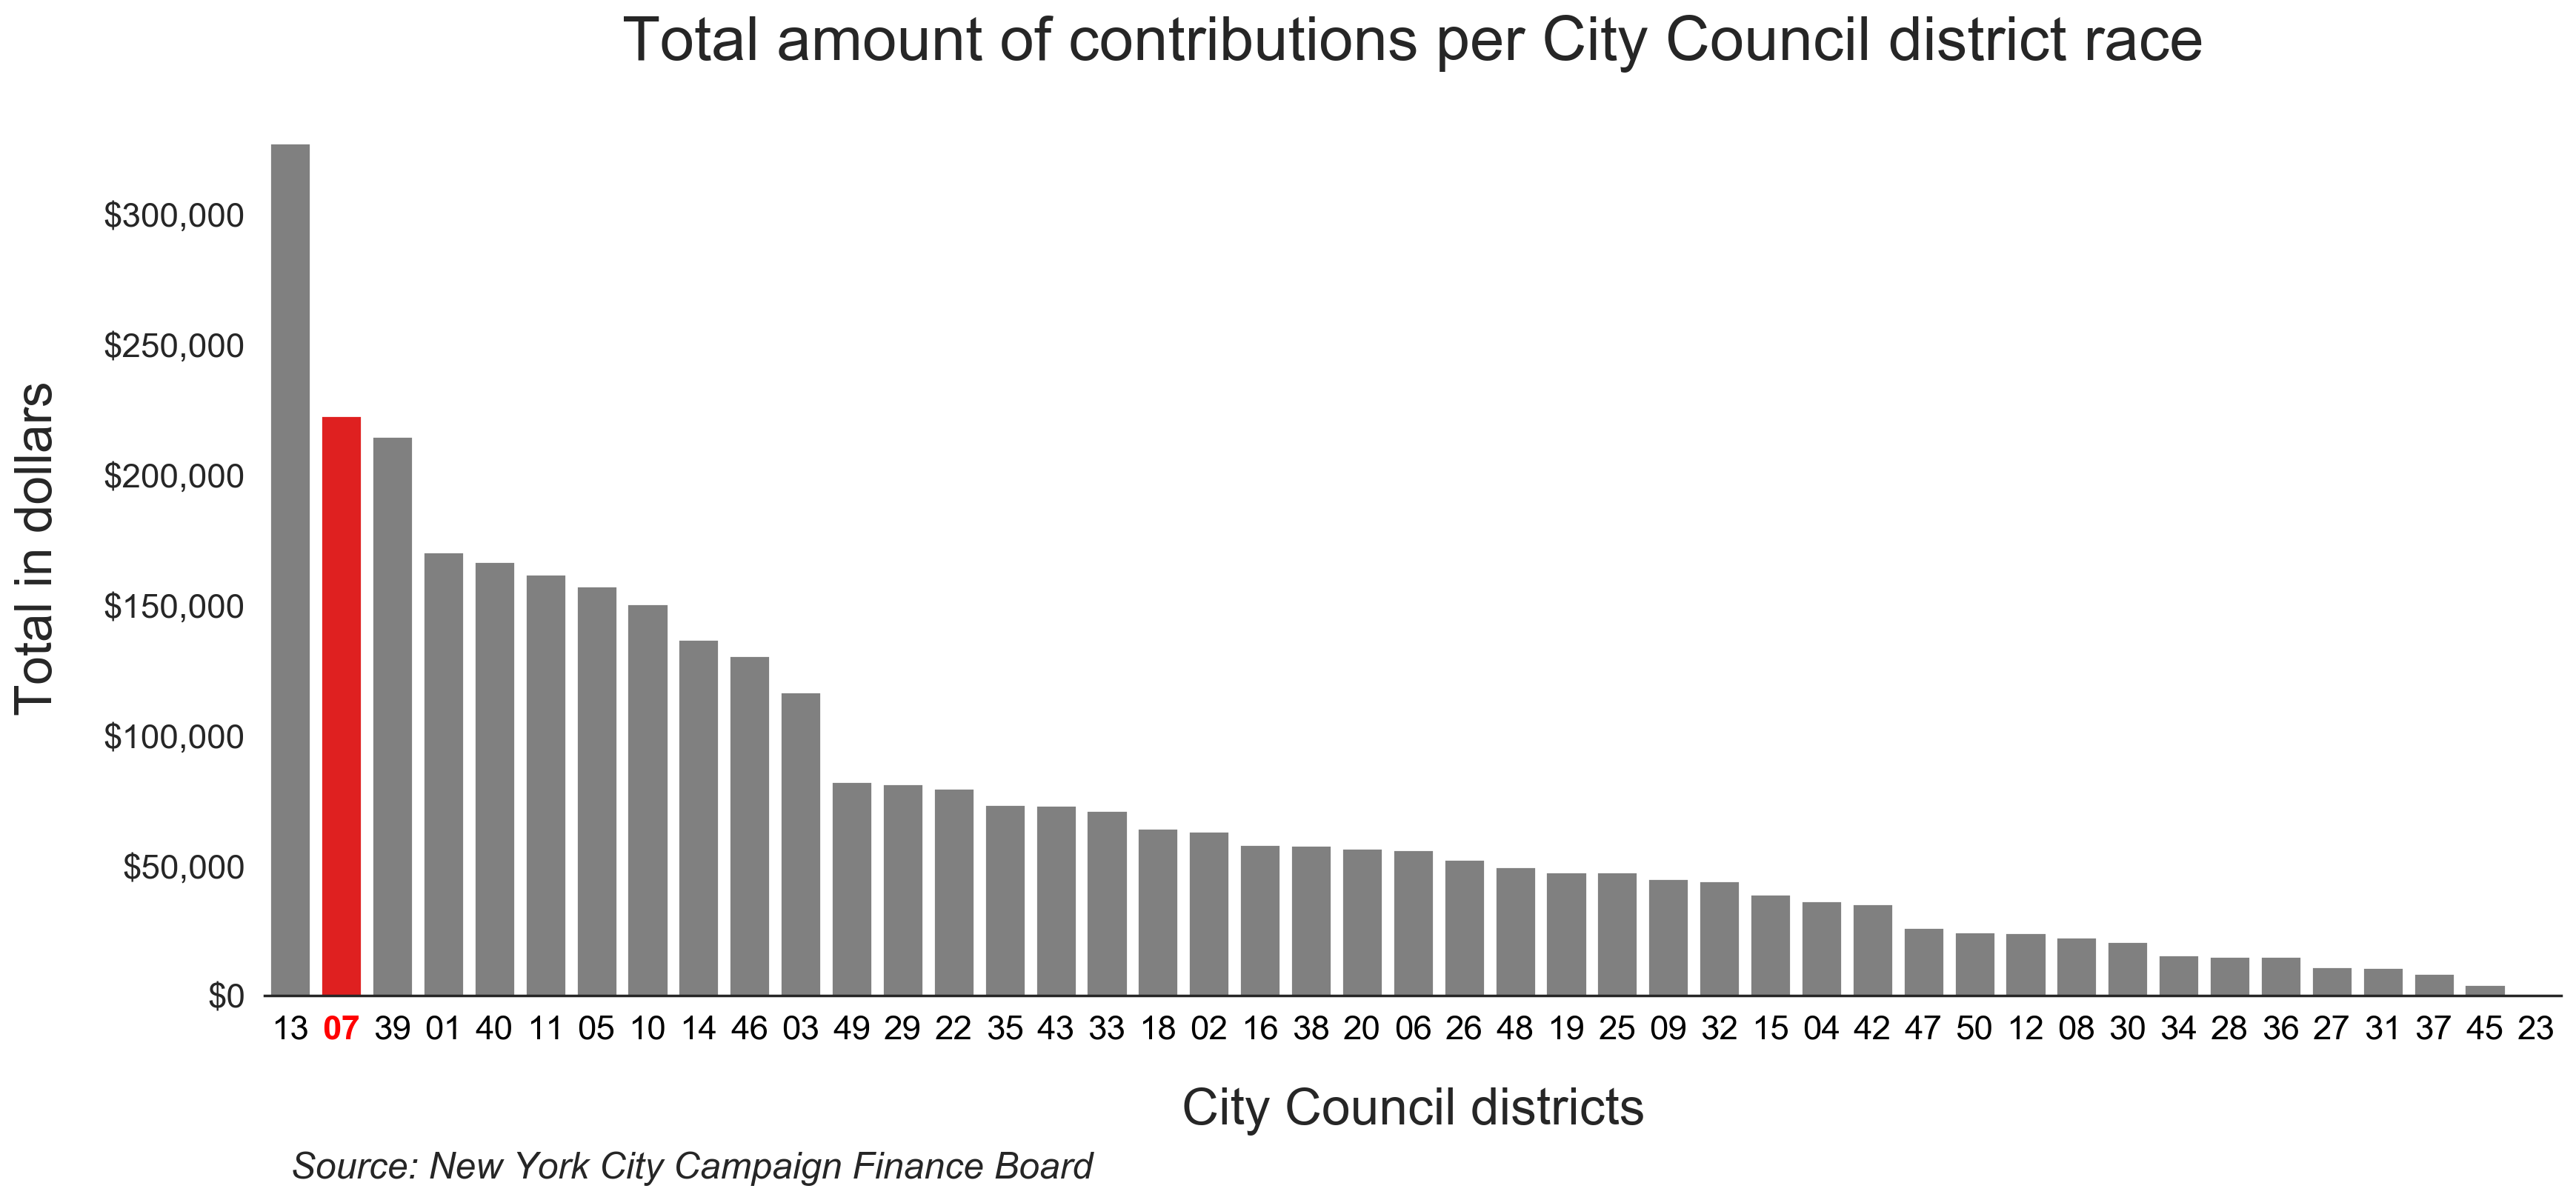

In [64]:

office_amount = candidate_contribution_2021.groupby('Office Sought', as_index=False)['AMNT'].sum()
council = office_amount[~office_amount['Office Sought'].isin(['Bronx Boro President', 'Brooklyn Boro President', 'Comptroller', 'Manhattan Boro President','Mayor','Public Advocate','Staten Island Boro President', 'Undeclared'])].sort_values('AMNT', ascending=False)

council['District'] = [ i[1] for i in council['Office Sought'].str.split("City Council District ")]
council['District'] = council['District'].astype(str)
council = council.reset_index(drop=True)

clrs = ['red' if (x == 222473.970) else 'grey' for x in council['AMNT']]

sns.set(font_scale = 1.5)
sns.set_style("white")

fig, ax = plt.subplots(figsize=(20,8),dpi=200)

ax = sns.barplot('District', 'AMNT', data=council, order=council['District'], palette=clrs)


plt.title('Total amount of contributions per City Council district race', fontsize = 30, pad = 20)
plt.xlabel('City Council districts', fontsize = 25, labelpad=20)

sns.despine(left=True)
plt.ylabel('Total in dollars', fontsize=25, labelpad=20)

plt.xticks(rotation=0)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.text(text ='Source: New York City Campaign Finance Board', style='italic',x = 0, y = -70000, s = 12)
[t.set_color('red') if t.get_text()=='07' else t.set_color('black') for t in ax.xaxis.get_ticklabels()]

[t.set_fontweight('extra bold') if t.get_text()=='07' else t.set_fontweight('normal') for t in ax.xaxis.get_ticklabels()]

#[t.set_fontsize('large') if t.get_text()=='07' else t.set_fontsize('medium') for t in ax.xaxis.get_ticklabels()]




# How many contributors do each candidate have?

Text(0, 0.5, 'Number of Contributors')

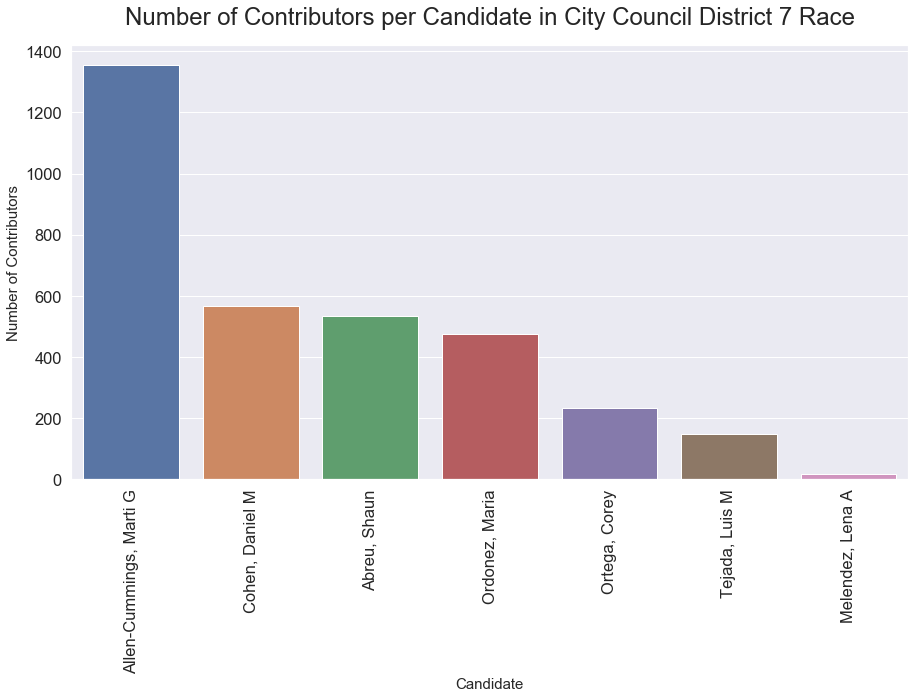

In [13]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = cd7_2021.groupby(['RECIPNAME'], as_index=False)['AMNT'].count().sort_values('AMNT', ascending=False))
plt.xticks(rotation = 90)

plt.title('Number of Contributors per Candidate in City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Number of Contributors', fontsize = 15)




# Who are the top 10 donors of CD 7 race?



In [14]:
cd7_2021.groupby(['NAME','OCCUPATION','EMPNAME','C_CODE','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False).head(10)


,NAME,OCCUPATION,EMPNAME,C_CODE,RECIPNAME,AMNT
306,"Cohen, Daniel",Affordable housing nonprofit,Housing Partnership,IND,"Cohen, Daniel M",2550.000
1336,"Plesner, Rene",President,Rene Plessner Associates Inc.,IND,"Abreu, Shaun",2000.000
605,"Gelman, S. Asher",Director/Playwright,Self-Employed,IND,"Allen-Cummings, Marti G",1175.000
1250,"Ordonez, Luis A",Salesman,Bandi Fashion,FAM,"Ordonez, Maria",1175.000
728,"Hemmerdinger, Dale",executive,Atco Properties,IND,"Abreu, Shaun",1100.000
283,"Charles, Bolivar",Analyst,113 Capital LLC,IND,"Abreu, Shaun",1050.000
634,"Goldshine, Scott",General Manager,Zabars,IND,"Abreu, Shaun",1000.000
1126,"Miller, Ellen",Associate,Rene Plessner Associates,IND,"Abreu, Shaun",1000.000
766,"Hollander, Nancy",Assistant Commissioner,New York State Office of Menta,IND,"Abreu, Shaun",1000.000
902,"Lafond, Norman",Consulting Engineer,Self-Employed,IND,"Abreu, Shaun",1000.000


# Who are the top 10 Columbia-affiliated donors?

In [17]:

cd7_2021[(cd7_2021['EMPNAME'].str.contains('Columbia', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False).head(10)


,NAME,OCCUPATION,EMPNAME,RECIPNAME,AMNT
28,"Perlman, Elaine",Teacher,"Teachers College, Columbia Uni","Cohen, Daniel M",275.000
22,"Montas, Roosevelt",Professor,Columbia University,"Abreu, Shaun",175.000
4,"Camp, Matthew",Government Relations,"Teachers College, Columbia Uni","Cohen, Daniel M",125.000
15,"Hubbard, Philip",Teacher,Columbia Secondary School,"Ordonez, Maria",100.000
2,"Benitez, Victoria",Administrator,Columbia University,"Abreu, Shaun",100.000
27,"Patel, Kiri",College Counselor,Columbia Secondary School,"Ordonez, Maria",100.000
9,"Eden, Kathy",Professor,Columbia University,"Abreu, Shaun",100.000
10,"Falco, Michael",Associate Director,Columbia University,"Allen-Cummings, Marti G",100.000
11,"Gillooly, Eileen",Professor/Administrator,Columbia University,"Abreu, Shaun",100.000
16,"Lee, Jessica",Lecturer,Columbia University,"Abreu, Shaun",90.000


# Q4: What about real estate/housing employeers and employees?

In [309]:

all_city_councils = candidate_contribution_2021[~candidate_contribution_2021['Office Sought'].isin(['Bronx Boro President', 'Brooklyn Boro President', 'Comptroller', 'Manhattan Boro President','Mayor','Public Advocate','Staten Island Boro President', 'Undeclared'])]

councils_emp_dev =all_city_councils[all_city_councils['EMPNAME'].str.contains('Dev')==True].groupby(['RECIPNAME','Office Sought'], as_index=False)['AMNT'].sum()
councils_emp_estate =all_city_councils[all_city_councils['EMPNAME'].str.contains('estate', flags=re.IGNORECASE)==True].groupby(['NAME','RECIPNAME','Office Sought'], as_index=False)['AMNT'].sum()

councils_occup_estate = all_city_councils[(all_city_councils['OCCUPATION'].str.contains('estate', flags=re.IGNORECASE)==True)].groupby(['NAME','RECIPNAME','Office Sought'], as_index=False)['AMNT'].sum()

councils_occup_housing = all_city_councils[(all_city_councils['OCCUPATION'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','RECIPNAME','Office Sought'], as_index=False)['AMNT'].sum()

councils_emp_housing =  all_city_councils[(all_city_councils['EMPNAME'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','RECIPNAME','Office Sought'], as_index=False)['AMNT'].sum()

frames = [councils_emp_dev, councils_emp_estate, councils_emp_housing, councils_occup_estate, councils_occup_housing]
real_estate_councils = pd.concat(frames).drop_duplicates()

real_estate_cd7 = real_estate_councils[real_estate_councils['Office Sought']=='City Council District 07']
occup_housing = councils_occup_housing[councils_occup_housing['Office Sought']=='City Council District 07']

emp_housing = councils_emp_housing[councils_emp_housing['Office Sought']=='City Council District 07']

occup_estate = councils_occup_estate[councils_occup_estate['Office Sought']=='City Council District 07']

emp_estate = councils_emp_estate[councils_emp_estate['Office Sought']=='City Council District 07']


/Users/ivanamoore/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# Proportion of Housing vs Estate for all Council Races

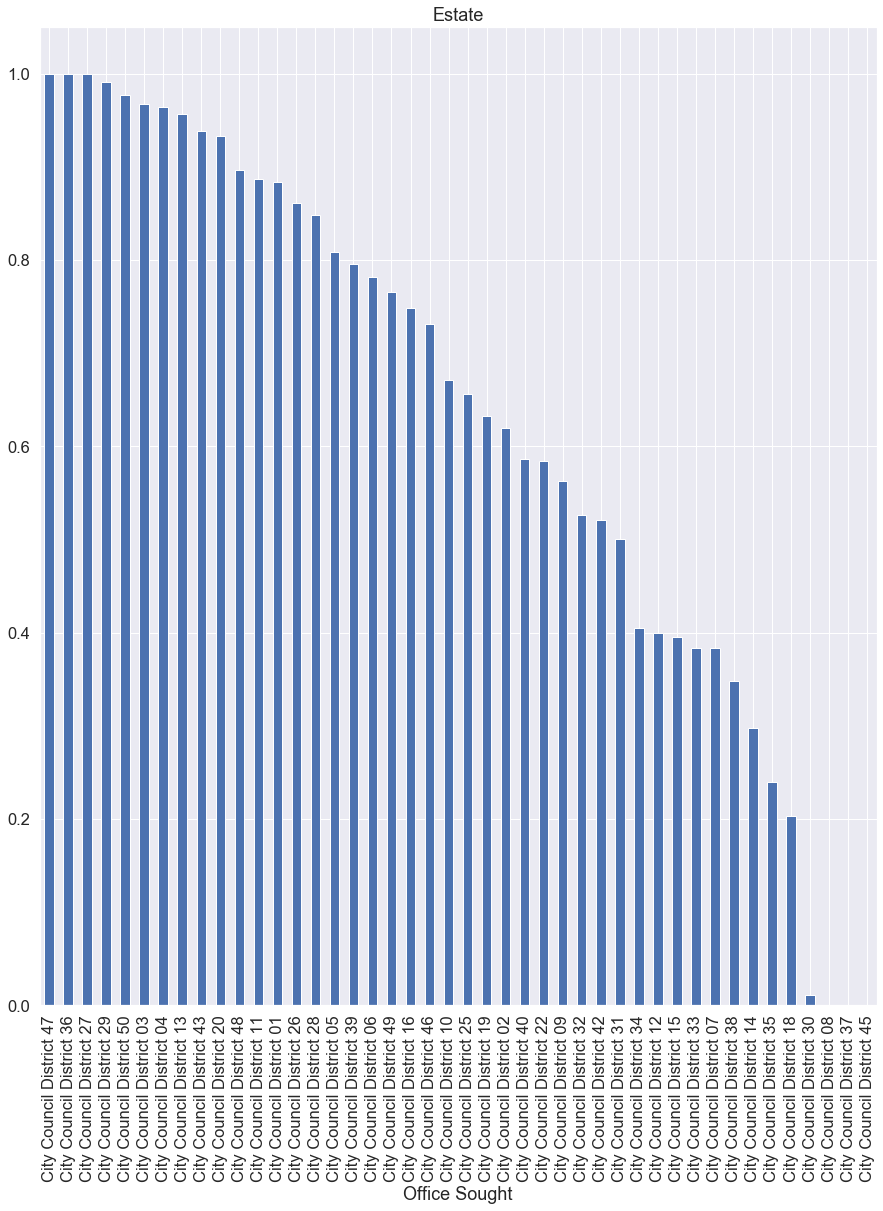

In [349]:

(pd.concat([councils_occup_estate,councils_emp_estate]).drop_duplicates().groupby('Office Sought')['AMNT'].sum()/real_estate_councils.groupby('Office Sought')['AMNT'].sum()).sort_values(ascending=False).plot(kind='bar',figsize=(15,18),title='Estate')


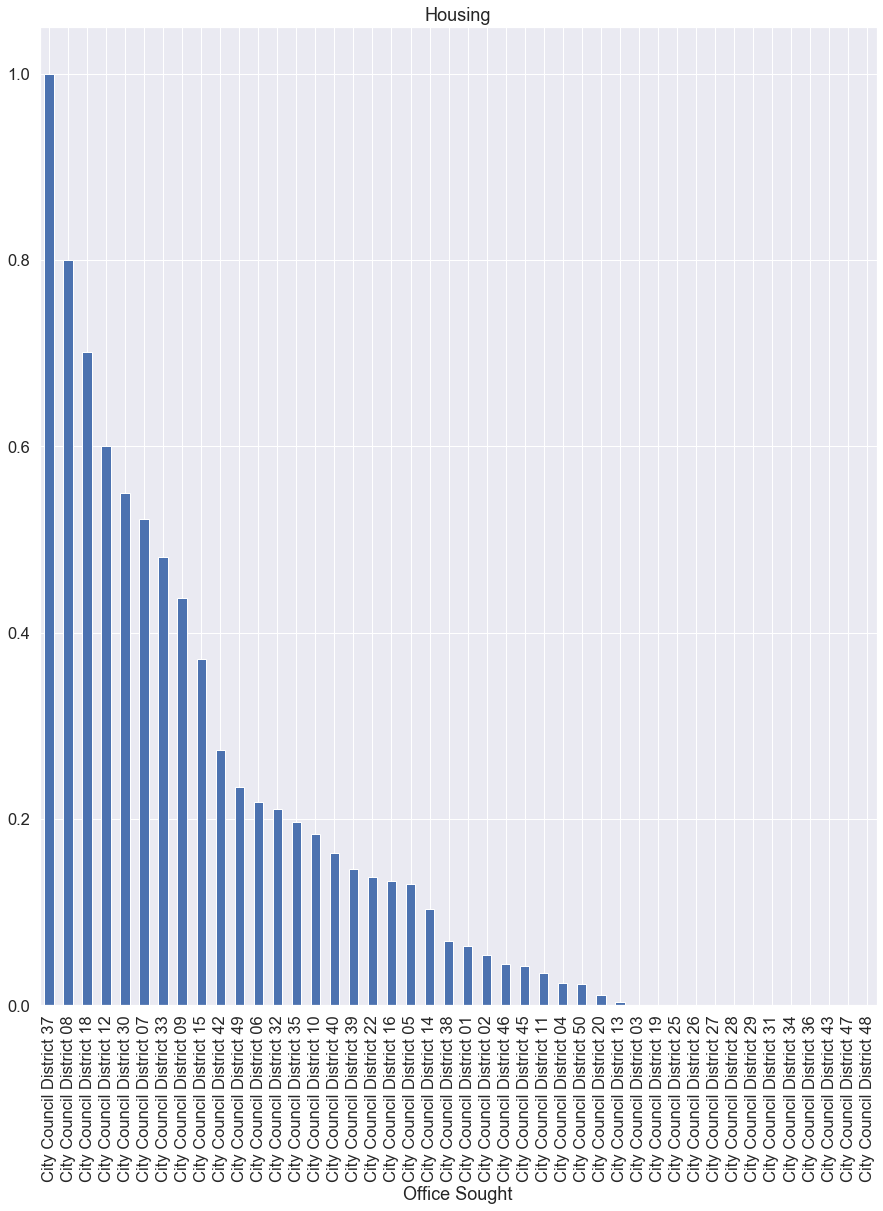

In [350]:
(pd.concat([councils_occup_housing,councils_emp_housing]).drop_duplicates().groupby('Office Sought')['AMNT'].sum()/real_estate_councils.groupby('Office Sought')['AMNT'].sum()).sort_values(ascending=False).plot(kind='bar',figsize=(15,18),title='Housing')

# Real Estate in CD7

In [311]:
print('Total amount of "housing" related: $' + str(pd.concat([occup_housing,emp_housing]).drop_duplicates()['AMNT'].sum())+ '\nand proportion from total is '+ str(pd.concat([occup_housing,emp_housing]).drop_duplicates()['AMNT'].sum()/real_estate_cd7['AMNT'].sum()) )
print('\nTotal amount of "estate" related: $' + str(pd.concat([occup_estate,emp_estate]).drop_duplicates()['AMNT'].sum())+ '\nand proportion from total is '+ str(pd.concat([occup_estate,emp_estate]).drop_duplicates()['AMNT'].sum()/real_estate_cd7['AMNT'].sum()))

Total amount of "housing" related: $7247.8099999999995
and proportion from total is 0.5215448725282996

Total amount of "estate" related: $5324.0
and proportion from total is 0.38310950498711577


In [312]:

print("The total from real estate in this race is: " +  str(real_estate_cd7['AMNT'].sum()))

print("The proportion of real estate constributions in this race is: "+ str(real_estate_cd7['AMNT'].sum() / cd7_2021['AMNT'].sum()))



The total from real estate in this race is: 13896.81
The proportion of real estate constributions in this race is: 0.06246488072289985


# How much does each candidate in CD7 have from real estate affiliates?

Text(0, 0.5, 'Amount in Dollars')

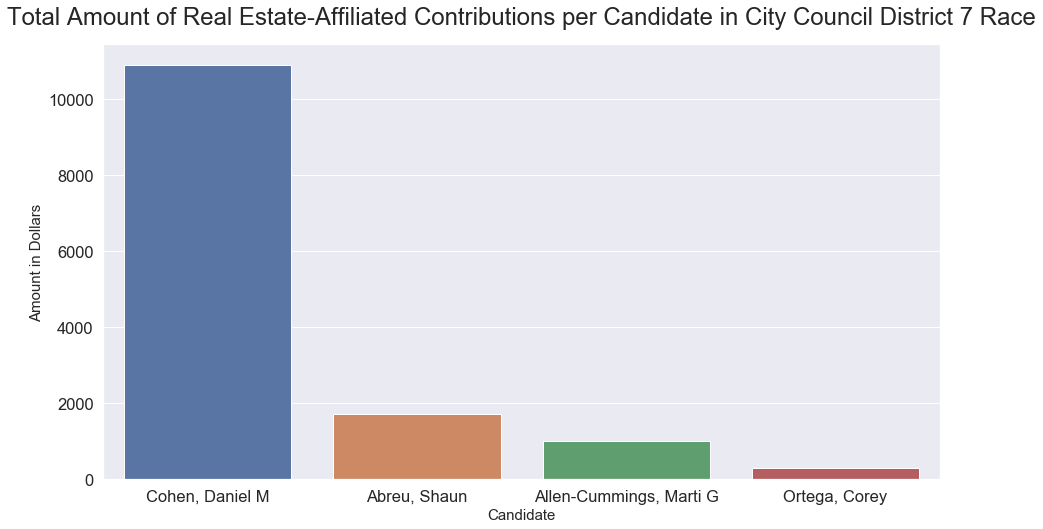

In [351]:

real_estate_candidates = real_estate_cd7.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = real_estate_candidates)

plt.title('Total Amount of Real Estate-Affiliated Contributions per Candidate in City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Amount in Dollars', fontsize = 15)




# Who are the top 10 real estate-affiliated donors?

In [33]:
real_estate_cd7[real_estate_cd7['AMNT']>=200].sort_values('AMNT', ascending=False).head(10)

,NAME,OCCUPATION,EMPNAME,RECIPNAME,AMNT
1,"Cohen, Daniel",Affordable housing nonprofit,Housing Partnership,"Cohen, Daniel M",2550.00
14,"Hershey, Matthew",Real Estate Finance,Hodes Weill & Assoc.,"Cohen, Daniel M",500.00
2,"Cohen, Daniel",Vice President,Housing Partnership,"Cohen, Daniel M",432.81
15,"Higgins, Thomas",Real estate,LMC,"Abreu, Shaun",375.00
21,"Loya, Michael",Real Estate,JPMorgan Chase & Co.,"Abreu, Shaun",275.00
5,"Schulman, Ronald",Affordable Housing,Best Development Group LLC,"Cohen, Daniel M",250.00
6,"Springer, Jonathan",Attorney,Women's Housing & Economic Dev,"Cohen, Daniel M",250.00
30,"Powell, DeWayne A.",Real Estate Agent,Self-Employed,"Abreu, Shaun",250.00
20,"Kramer, David",Real Estate,Hudson Companies,"Cohen, Daniel M",250.00
24,"Marcovici, Elias",Real Estate,Blake Partners LLC,"Cohen, Daniel M",250.00


In [314]:
cd7_2021.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum()


,RECIPNAME,AMNT
0,"Abreu, Shaun",66144.000
1,"Allen-Cummings, Marti G",69013.000
2,"Cohen, Daniel M",49038.810
3,"Melendez, Lena A",652.000
4,"Ordonez, Maria",21497.160
5,"Ortega, Corey",11385.000
6,"Tejada, Luis M",4744.000


                 RECIPNAME      AMNT
2          Cohen, Daniel M 10896.810
0             Abreu, Shaun  1710.000
1  Allen-Cummings, Marti G   995.000
3            Ortega, Corey   295.000
2   0.784
0   0.123
1   0.072
3   0.021
Name: AMNT, dtype: float64
RECIPNAME
Abreu, Shaun              0.026
Allen-Cummings, Marti G   0.014
Cohen, Daniel M           0.222
Melendez, Lena A            nan
Ordonez, Maria              nan
Ortega, Corey             0.026
Tejada, Luis M              nan
Name: AMNT, dtype: float64


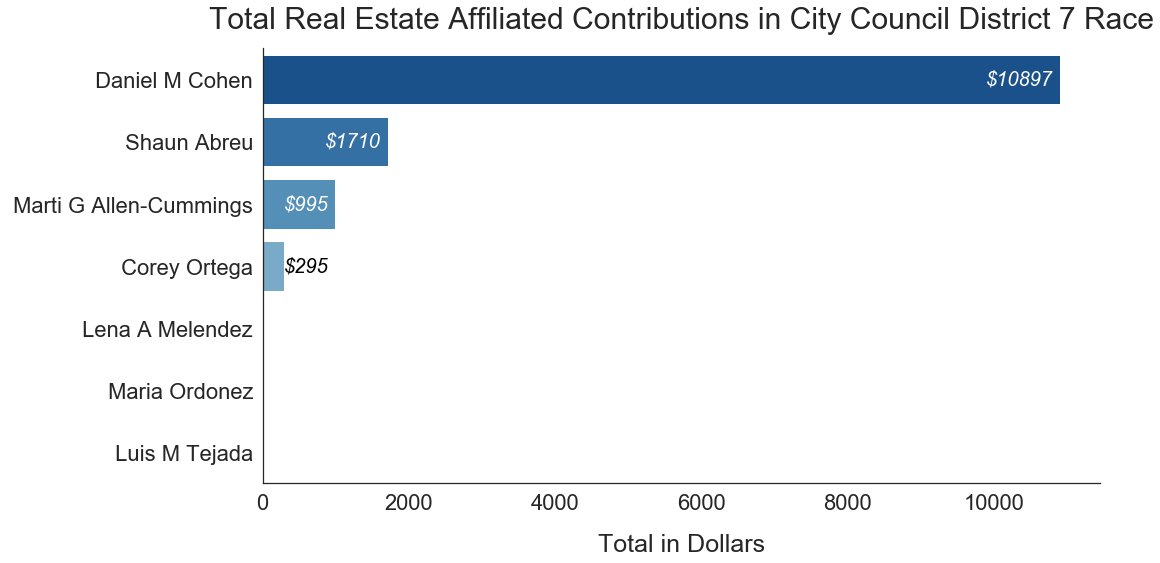

In [488]:
print(real_estate_candidates)
print(real_estate_candidates['AMNT']/ real_estate_candidates['AMNT'].sum() )
print(real_estate_candidates.groupby('RECIPNAME')['AMNT'].sum().div(cd7_2021.groupby('RECIPNAME')['AMNT'].sum()))
re_all_candidates = pd.concat([real_estate_candidates,pd.DataFrame({"RECIPNAME":['Melendez, Lena A','Ordonez, Maria','Tejada, Luis M'],'AMNT':[0.0,0.0,0.0]})]).reset_index()
re_all_candidates['Candidates'] = [ " ".join([i[1],i[0]]) for i in re_all_candidates['RECIPNAME'].str.split(",")]
amounts = re_all_candidates['AMNT']
plt.figure(figsize=(15,8))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.barplot('AMNT', 'Candidates', data = re_all_candidates,palette='Blues_r')
plt.xticks(rotation = 0)
sns.despine()
plt.ylabel('')
plt.title('Total Real Estate Affiliated Contributions in City Council District 7 Race', fontsize = 30, pad = 20)
plt.xlabel('Total in Dollars', fontsize = 25, labelpad = 20)

for p in ax.patches:
    width = p.get_width()
    if width>500:
        ax.text(width -100,      
                p.get_y() + p.get_height() / 2,
                '${:1.0f}'.format(width),
                ha = "right", 
                va = 'center', color='white', size = 20, fontstyle='italic')
    elif width==295:
        ax.text(width, 
                p.get_y() + p.get_height() / 2, 
                '${:1.0f}'.format(width), 
                ha = "left", 
                va = 'center', color='black', size = 20, fontstyle='italic')  

# What about other industries?

## Finance

In [88]:

cd7_2021[(cd7_2021['OCCUPATION'].str.contains('finance|accountant|corporate', flags=re.IGNORECASE)==True) &(cd7_2021['AMNT']>0)]['AMNT'].count()

print('Finance affiliated proportion from total is '+ str(cd7_2021[(cd7_2021['OCCUPATION'].str.contains('finance|accountant|corporate', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2021['AMNT'].sum()))



Finance affiliated proportion from total is 0.009084208817777648


## Education

In [89]:

cd7_2021[(cd7_2021['OCCUPATION'].str.contains('teacher|professor|principal|superintendent|academic', flags=re.IGNORECASE)==True) &(cd7_2021['AMNT']>0)]['AMNT'].count()

print('Education affiliated proportion from total is '+ str(cd7_2021[(cd7_2021['OCCUPATION'].str.contains('teacher|professor|principal|superintendent|academic', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2021['AMNT'].sum()))

Education affiliated proportion from total is 0.0313789518836743


## Medical

In [90]:

cd7_2021[(cd7_2021['OCCUPATION'].str.contains('dentist|doctor|surgeon|therapist', flags=re.IGNORECASE)==True)&(cd7_2021['AMNT']>0)]['AMNT'].count()

print('Medical affiliated proportion from total is '+ str(cd7_2021[(cd7_2021['OCCUPATION'].str.contains('dentist|doctor|surgeon|therapist', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2021['AMNT'].sum()))

Medical affiliated proportion from total is 0.006337820105426266


## Legal

In [91]:
cd7_2021[(cd7_2021['OCCUPATION'].str.contains('lawyer|legal|law', flags=re.IGNORECASE)==True)&(cd7_2021['AMNT']>0)]['AMNT'].count()

print('Legal affiliated proportion from total is '+ str(cd7_2021[(cd7_2021['OCCUPATION'].str.contains('lawyer|legal|law', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2021['AMNT'].sum()))


Legal affiliated proportion from total is 0.03330726736255932


## Arts 

In [92]:

cd7_2021[(cd7_2021['OCCUPATION'].str.contains('writer|actor|producer|music|art', flags=re.IGNORECASE)==True)&(cd7_2021['AMNT']>0)]['AMNT'].count()

print('Arts affiliated proportion from total is '+ str(cd7_2021[(cd7_2021['OCCUPATION'].str.contains('writer|actor|producer|music|art', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2021['AMNT'].sum()))

Arts affiliated proportion from total is 0.05734153977654105


# Real Estate Contributions for other Races

AMNT   0.026
dtype: float64


Text(0, 0.5, 'Total Amount in Dollars')

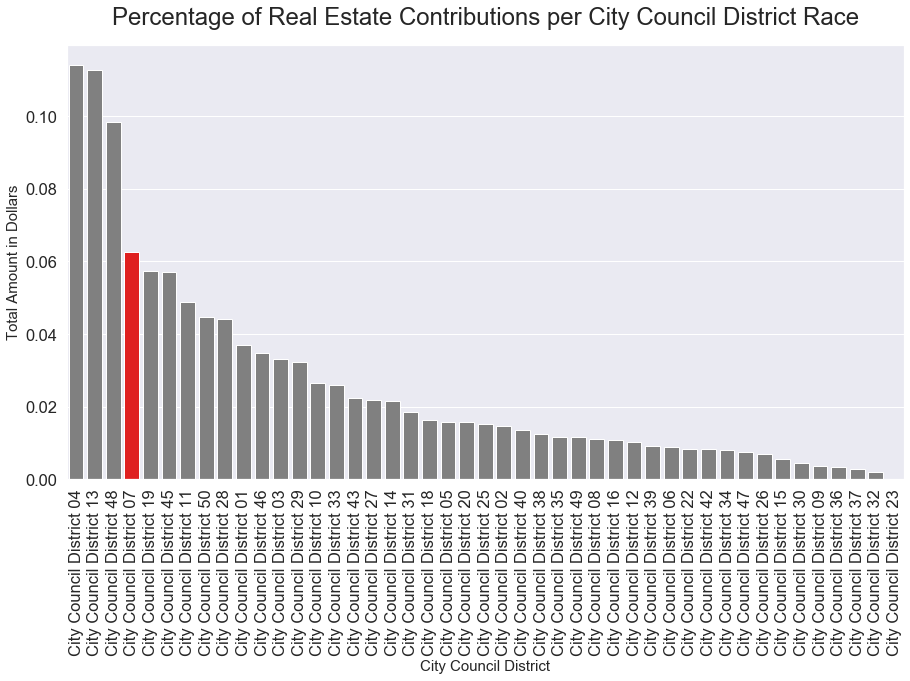

In [330]:
council = council.sort_values('Office Sought')

re_council = real_estate_councils.groupby('Office Sought').sum().div(council).sort_values(['AMNT'], ascending=False)

print(re_council.mean())
plt.figure(figsize=(15,8))
clrs = ['red' if (x == 'City Council District 07') else 'grey' for x in re_council.index ]

re
sns.barplot(re_council.index, re_council['AMNT'],palette=clrs)
plt.xticks(rotation = 90)

plt.title('Percentage of Real Estate Contributions per City Council District Race', fontsize = 24, pad = 20)
plt.xlabel('City Council District', fontsize = 15)
plt.ylabel('Total Amount in Dollars', fontsize = 15)

# How does CD7 compare over time (2021 vs 2013)?

In [36]:
cd7_2013 = pd.read_csv('2013_Contributions.csv')
dicts = {'Years':['2013','2021'], 'Total Amount':[cd7_2013['AMNT'].sum(),cd7_2021['AMNT'].sum()] }
cd7_allyears = pd.DataFrame.from_dict(dicts)

In [37]:
print("Total sum in 2013: " + str(cd7_2013['AMNT'].sum()))

print ("\nEnding Amounts per Candidate in 2013: \n")
print(cd7_2013.groupby('RECIPNAME')['AMNT'].sum())

Total sum in 2013: 177689.48

Ending Amounts per Candidate in 2013: 

RECIPNAME
Gonzalez, Christina E      4505.00
Levine, Mark D           133427.48
Tejada, Luis M            39757.00
Name: AMNT, dtype: float64


Text(0, 0.5, 'Amount of Contributions in Dollars')

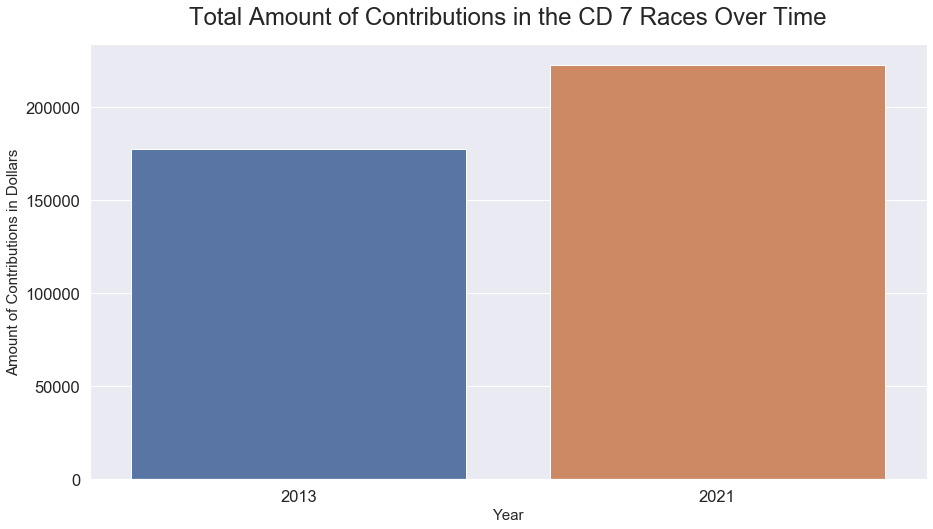

In [38]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot(cd7_allyears['Years'], cd7_allyears['Total Amount'])

plt.xticks(rotation = 0)

plt.title('Total Amount of Contributions in the CD 7 Races Over Time', fontsize = 24, pad = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Amount of Contributions in Dollars', fontsize = 15)


# Real Estate Contributions in 2013

In [42]:
emp_dev_2013 =cd7_2013[cd7_2013['EMPNAME'].str.contains('Dev')==True].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

emp_estate_2013 =cd7_2013[cd7_2013['EMPNAME'].str.contains('estate', flags=re.IGNORECASE)==True].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

occup_estate_2013 = cd7_2013[(cd7_2013['OCCUPATION'].str.contains('estate', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

occup_housing_2013 = cd7_2013[(cd7_2013['OCCUPATION'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

emp_housing_2013 =  cd7_2013[(cd7_2013['EMPNAME'].str.contains('housing', flags=re.IGNORECASE)==True)].groupby(['NAME','OCCUPATION','EMPNAME','RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

frames_2013 = [emp_dev_2013, emp_estate_2013, emp_housing_2013, occup_estate_2013, occup_housing_2013]
real_estate_cd7_2013 = pd.concat(frames_2013).drop_duplicates()



In [71]:
print('Total amount of "housing" related: $' + str(pd.concat([occup_housing_2013,emp_housing_2013]).drop_duplicates()['AMNT'].sum())+ '\nand proportion from total is '+ str(pd.concat([occup_housing_2013,emp_housing_2013]).drop_duplicates()['AMNT'].sum()/real_estate_cd7_2013['AMNT'].sum()) )
print('\nTotal amount of "estate" related: $' + str(pd.concat([occup_estate_2013,emp_estate_2013]).drop_duplicates()['AMNT'].sum())+ '\nand proportion from total is '+ str(pd.concat([occup_estate_2013,emp_estate_2013]).drop_duplicates()['AMNT'].sum()/real_estate_cd7_2013['AMNT'].sum()))


Total amount of "housing" related: $1025.0
and proportion from total is 0.21901709401709402

Total amount of "estate" related: $3130.0
and proportion from total is 0.6688034188034188


In [44]:

print("The total from real estate in the 2013 race was: " +  str(real_estate_cd7_2013['AMNT'].sum()))

print("The proportion of real estate constributions in the 2013 race was: "+ str(real_estate_cd7_2013['AMNT'].sum() / cd7_2013['AMNT'].sum()))



The total from real estate in the 2013 race was: 4680.0
The proportion of real estate constributions in the 2013 race was: 0.02633808146661243


Text(0, 0.5, 'Amount in Dollars')

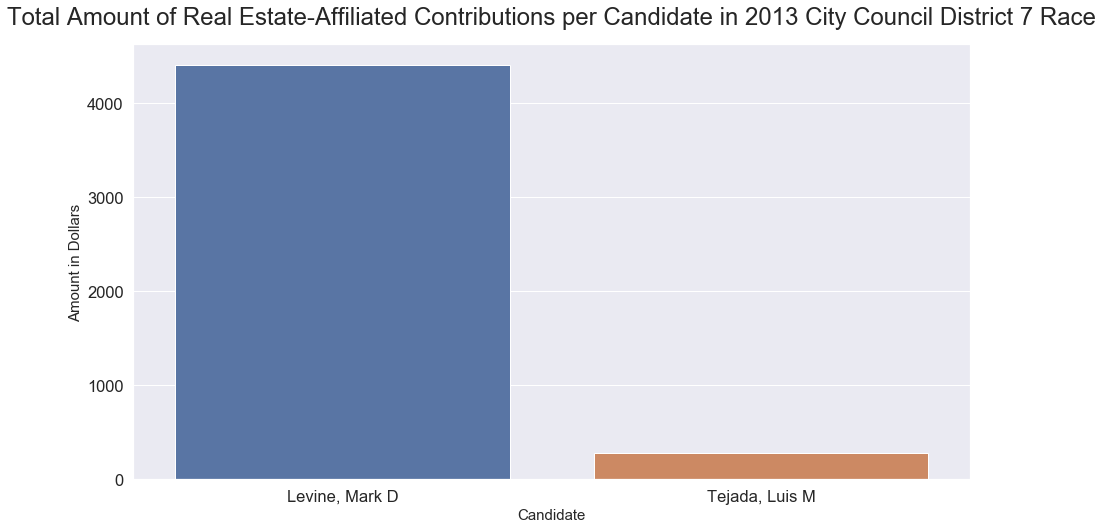

In [72]:

real_estate_candidates_2013 = real_estate_cd7_2013.groupby(['RECIPNAME'], as_index=False)['AMNT'].sum().sort_values('AMNT', ascending=False)

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.barplot('RECIPNAME', 'AMNT', data = real_estate_candidates_2013)

plt.title('Total Amount of Real Estate-Affiliated Contributions per Candidate in 2013 City Council District 7 Race', fontsize = 24, pad = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Amount in Dollars', fontsize = 15)



# Industries in 2013

## Finance

In [84]:

cd7_2013[(cd7_2013['OCCUPATION'].str.contains('finance|accountant|corporate', flags=re.IGNORECASE)==True) &(cd7_2013['AMNT']>0)]['AMNT'].count()

print('Finance affiliated proportion from total is '+ str(cd7_2013[(cd7_2013['OCCUPATION'].str.contains('finance|accountant|corporate', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2013['AMNT'].sum()))


Finance affiliated proportion from total is 0.008160303018501713


## Education

In [82]:

cd7_2013[(cd7_2013['OCCUPATION'].str.contains('teacher|professor|principal|superintendent|academic', flags=re.IGNORECASE)==True) &(cd7_2013['AMNT']>0)]['AMNT'].count()

print('Education affiliated proportion from total is '+ str(cd7_2013[(cd7_2013['OCCUPATION'].str.contains('teacher|professor|principal|superintendent|academic', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2013['AMNT'].sum()))


Education affiliated proportion from total is 0.05746946864834092


## Medical

In [83]:

cd7_2013[(cd7_2013['OCCUPATION'].str.contains('dentist|doctor|surgeon|therapist', flags=re.IGNORECASE)==True)&(cd7_2013['AMNT']>0)]['AMNT'].count()

print('Medical affiliated proportion from total is '+ str(cd7_2013[(cd7_2013['OCCUPATION'].str.contains('dentist|doctor|surgeon|therapist', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2013['AMNT'].sum()))

Medical affiliated proportion from total is 0.015487692349597735


## Legal

In [85]:
cd7_2013[(cd7_2013['OCCUPATION'].str.contains('lawyer|legal|law', flags=re.IGNORECASE)==True)&(cd7_2013['AMNT']>0)]['AMNT'].count()

print('Legal affiliated proportion from total is '+ str(cd7_2013[(cd7_2013['OCCUPATION'].str.contains('lawyer|legal|law', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2013['AMNT'].sum()))


Legal affiliated proportion from total is 0.005177571570359708


## Arts

In [87]:

cd7_2013[(cd7_2013['OCCUPATION'].str.contains('writer|actor|producer|music|art', flags=re.IGNORECASE)==True)&(cd7_2013['AMNT']>0)]['AMNT'].count()

print('Arts affiliated proportion from total is '+ str(cd7_2013[(cd7_2013['OCCUPATION'].str.contains('writer|actor|producer|music|art', flags=re.IGNORECASE)==True)]['AMNT'].sum().astype(float)/ cd7_2013['AMNT'].sum()))


Arts affiliated proportion from total is 0.024319616445498068
